In [1]:
import sys
sys.path.append("..")
import TabularMethods.action_value_methods as avm
import utils
import gymnasium as gym
import random
import numpy as np

# Settings

In [2]:
ENVIRONMENT_ID = "FrozenLake-v1"
NUM_EPISODES = 100000
GAMMA = 1
EPS_START = 1
EPS_END = 0.00
LEARNING_RATE = 0.01
RNG_SEED = 7
random.seed(RNG_SEED)

# One step Sarsa

Average return per episode: 0.14534


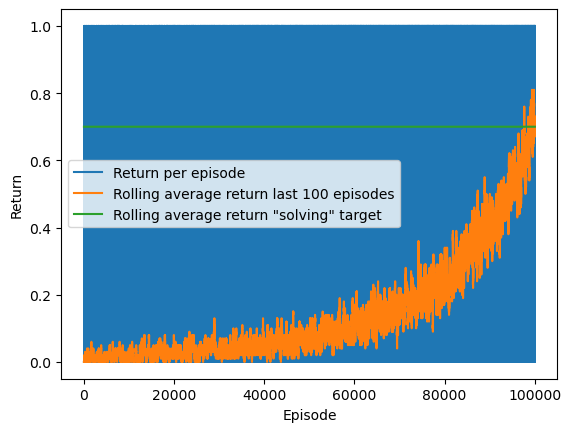

In [3]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
init_action_values = np.zeros((env.observation_space.n, env.action_space.n))
returns = avm.train_episodic_sarsa(env, init_action_values, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, LEARNING_RATE)
env.close()
utils.plot_returns(returns, env.spec.reward_threshold)

# Sarsa($\lambda$) (Sarsa with eligibility-traces)